In [1]:
setwd('../../')
source('.Rprofile')
setwd('./benchmark/analysis')

library(ggplot2)
library(tidyverse)
library(ggpubr)
library(reshape2)

[1] "/lustre/grp/gglab/xiacr/SLAT/renv/library/R-4.1/x86_64-pc-linux-gnu"         
[2] "/lustre/grp/gglab/xiacr/SLAT/renv/sandbox/R-4.1/x86_64-pc-linux-gnu/90a76c8d"


Warning message in system2("poetry", c("env", "info", "--path"), stdout = TRUE):
“running command ''poetry' env info --path' had status 1”


python:         /lustre/grp/gglab/xiacr/SLAT/conda/bin/python
libpython:      /lustre/grp/gglab/xiacr/SLAT/conda/lib/libpython3.8.so
pythonhome:     /lustre/grp/gglab/xiacr/SLAT/conda:/lustre/grp/gglab/xiacr/SLAT/conda
version:        3.8.17 | packaged by conda-forge | (default, Jun 16 2023, 07:06:00)  [GCC 11.4.0]
numpy:          /lustre/grp/gglab/xiacr/SLAT/conda/lib/python3.8/site-packages/numpy
numpy_version:  1.24.4

NOTE: Python version was forced by use_python function
[1] "/lustre/grp/gglab/xiacr/SLAT/conda/lib:/lustre/grp/gglab/xiacr/SLAT/resource/R/lib/R/lib:/usr/local/lib:/flash/grp/gglab/xiacr/SpatialLR-dev/resource/jdk1.8.0_361/jre/lib/i386/client:/opt/slurm-22.05.2/lib:/opt/slurm-22.05.2/lib/slurm:"


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
✔ purrr   1.0.0      
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




In [8]:
data <- read_csv('../results/benchmark.csv')
# data <- data %>% filter(cells %in% c(100,200,400,800,1600,3200,6400,12800,25600,51200,102400))
data <- data %>% filter(cells > 0 ) %>% filter(!method %in% c('SLAT', 'SLAT_harmony', 'PCA'))
data <- data[data$global_score > 0,]
data$cells <- as.numeric(data$cells)
data <- data %>% mutate(method = replace(method, method == 'SLAT_dpca', 'SLAT'))
data$method <- factor(data$method, levels = c('SLAT','PASTE','STAGATE','Harmony','Seurat'))
data <- data %>% 
  mutate(across('dataset', str_replace, 'merfish_mouse_hypothalamic', 'MERFISH')) %>%
  mutate(across('dataset', str_replace, 'visium_human_DLPFC', 'Visium')) %>%
  mutate(across('dataset', str_replace, 'stereo_mouse_embryo', 'Stereo-seq'))
data$dataset <- factor(data$dataset, levels = c('Visium','MERFISH','Stereo-seq'))
head(data,4)

Rows: 936 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): dataset, method
dbl (8): cells, seed, celltype_score, edge_score, euclidean_dis, global_scor...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


dataset,cells,seed,method,celltype_score,edge_score,euclidean_dis,global_score,region_score,run_time
<fct>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MERFISH,1600,0,Harmony,0.811875,-43.54000,0.40098505,0.264375,0.30375,2.580500
MERFISH,1600,0,PASTE,0.312500,-26.42375,0.02937850,0.235000,0.72125,11.847770
MERFISH,1600,0,SLAT,0.713125,-35.20625,0.05949673,0.465000,0.66000,4.714208
MERFISH,1600,0,STAGATE,0.256875,-50.07500,0.39578277,0.088750,0.27000,17.168893


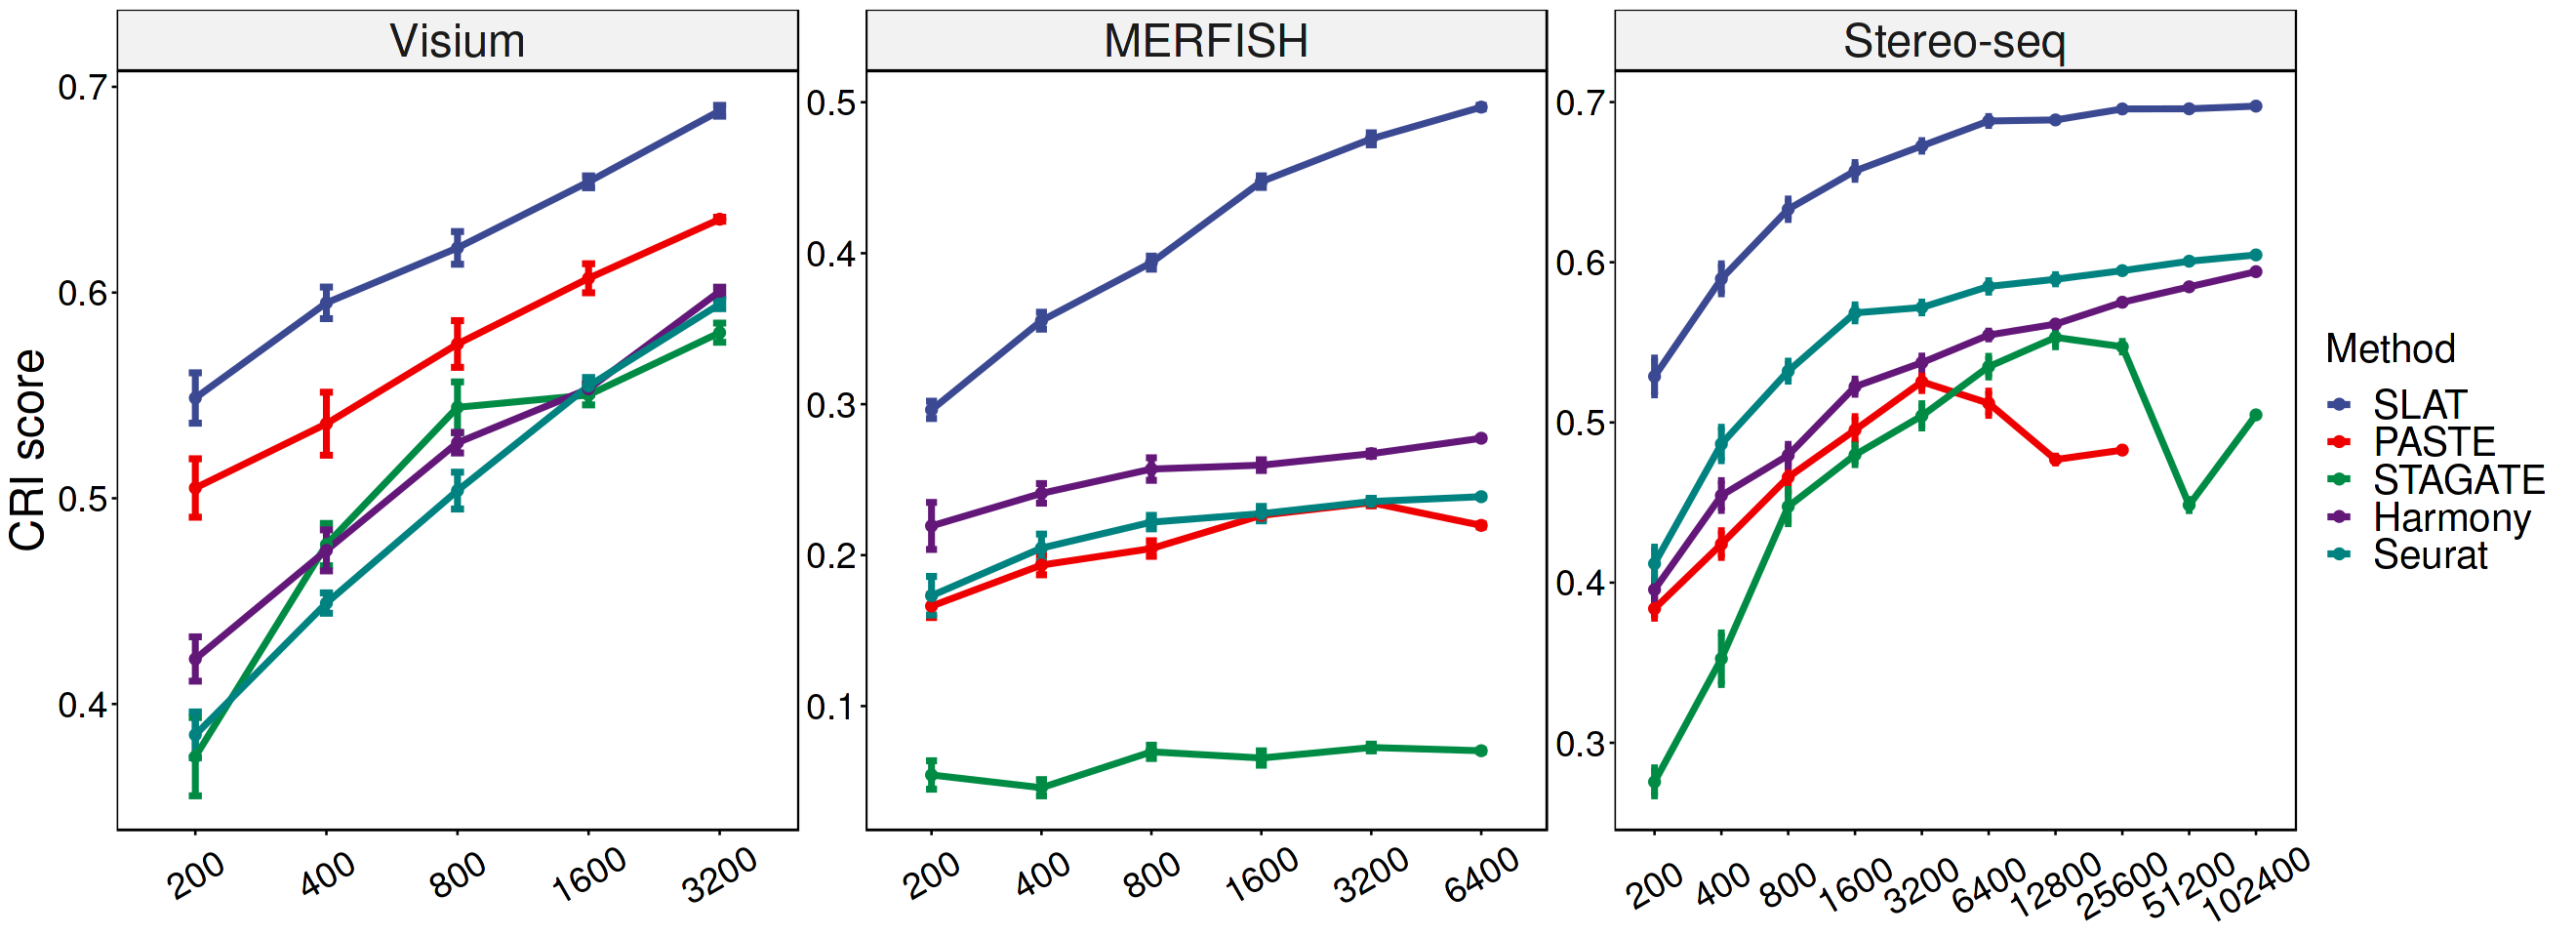

In [9]:
options(repr.plot.width=22, repr.plot.height=8)
ggline(data, x="cells", y="global_score", palette='aaas', color="method", legend.title = 'Method',
     add="mean_se", facet.by='dataset', xlab =F, ylab='CRI score',size=1.5, lab.size=10) %>%
ggpar(legend='right', font.legend=24, font.subtitle=24, font.xtickslab=22, font.ytickslab=22, font.y=28) + facet_wrap(~dataset, scales="free") +
theme(axis.text.x=element_text(angle=30, vjust=0.5, hjust=0.5), strip.text.x=element_text(size=28))

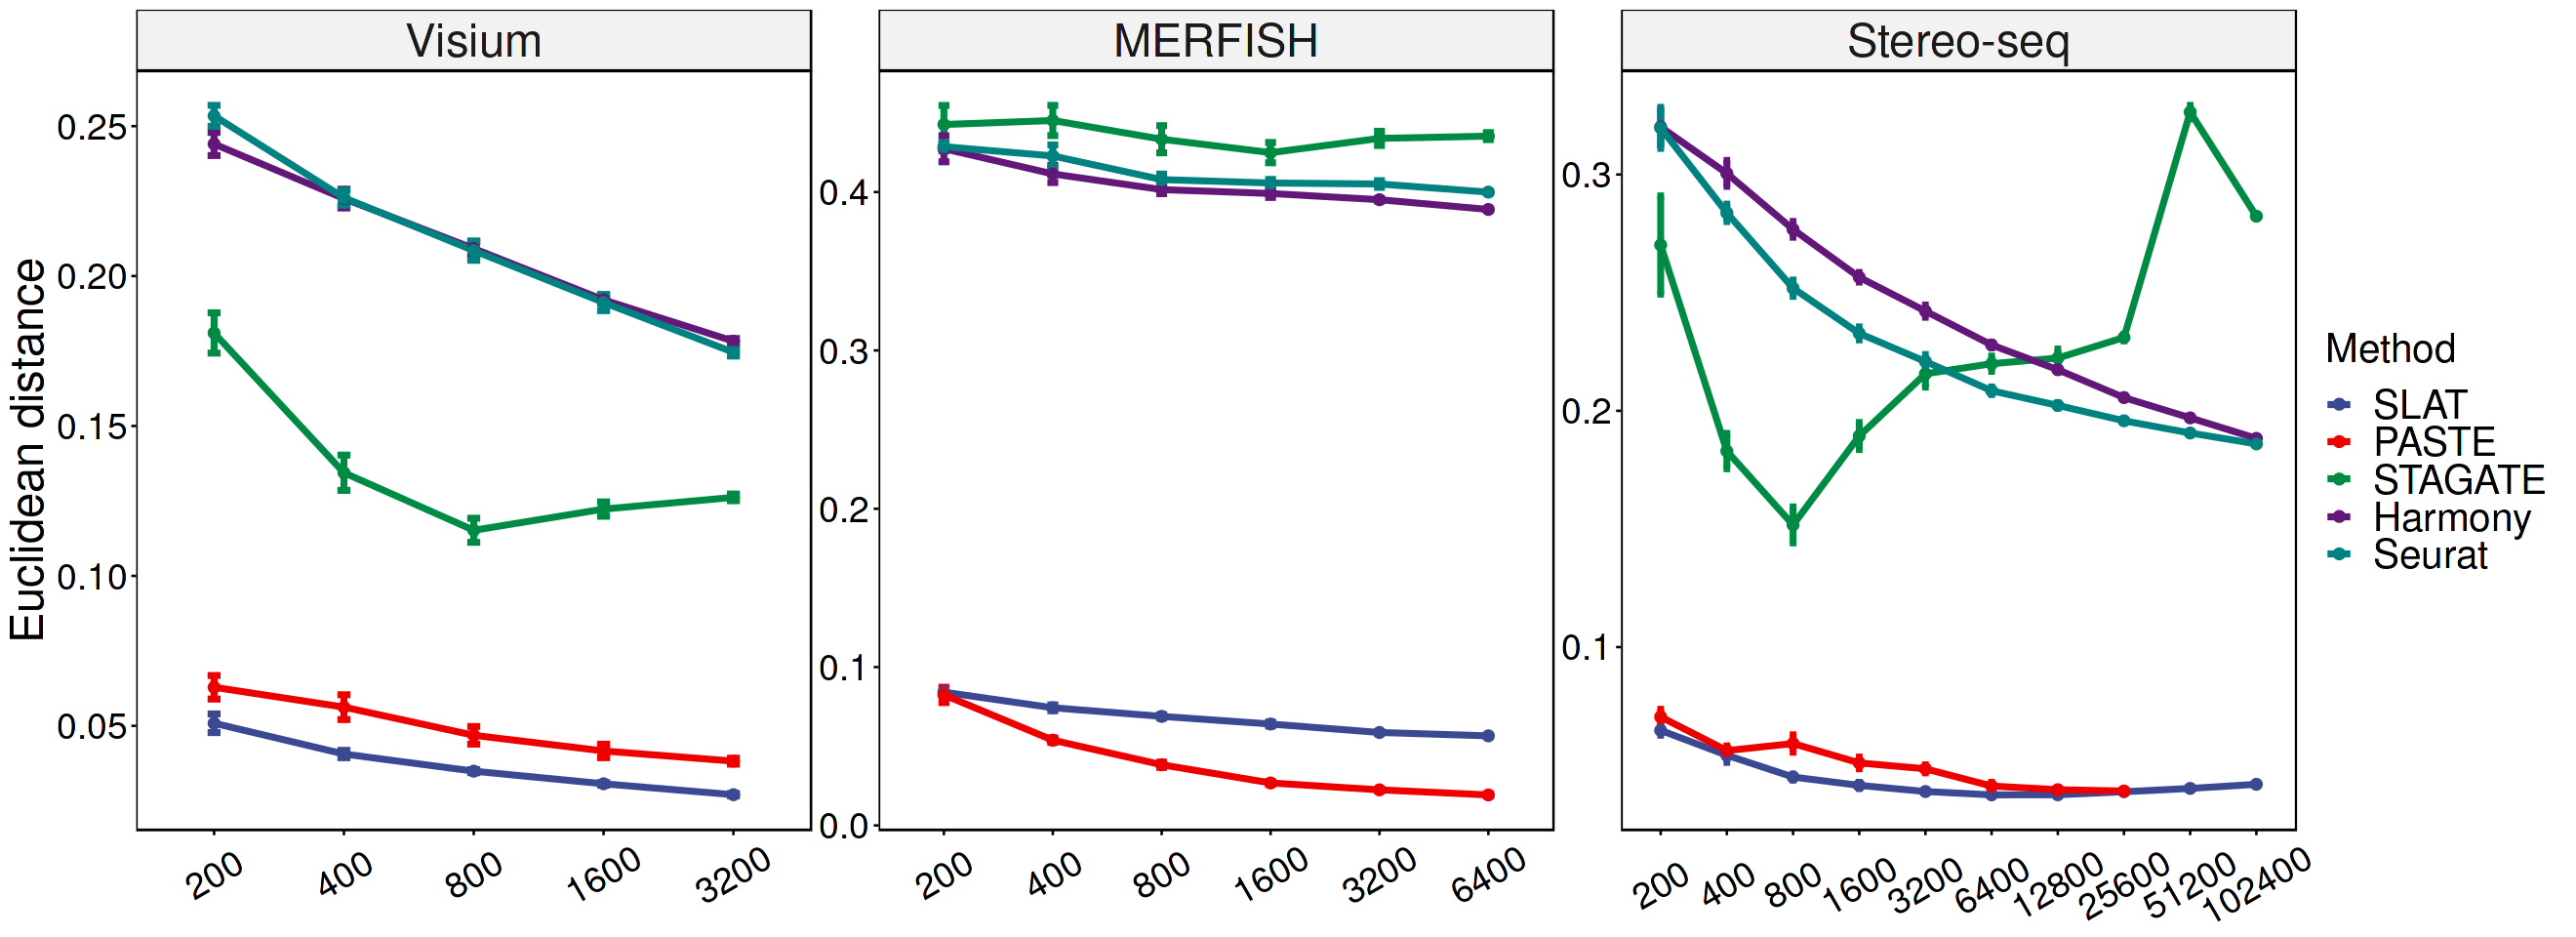

In [10]:
options(repr.plot.width=22, repr.plot.height=8)
ggline(data, x="cells", y="euclidean_dis", palette='aaas', color="method", legend.title='Method',
     add="mean_se", facet.by='dataset', xlab =F, ylab='Euclidean distance',size=1.5, lab.size=10) %>% 
ggpar(legend='right', font.legend=24, font.subtitle=24, font.xtickslab=22, font.ytickslab=22, font.y=28) + facet_wrap(~dataset, scales="free") +
theme(axis.text.x=element_text(angle=30, vjust=0.5, hjust=0.5), strip.text.x=element_text(size=28))

# Time analysis

In [5]:
data <- read_csv('../results/benchmark.csv')
data$cells <- as.numeric(data$cells)
# data <- data[data$cells %in% c(4000, 5000, 6000, 8000, 10000, 15000, 20000, 30000, 50000, 100000),]
data <- data %>% filter(cells >= 3200) %>% filter(!method %in% c('SLAT', 'SLAT_harmony', 'PCA'))
data <- data %>% mutate(method = replace(method, method == 'SLAT_dpca', 'SLAT'))
data$method <- factor(data$method, levels = c('SLAT','PASTE','STAGATE','Harmony','Seurat'))
head(data, 4)

Rows: 936 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): dataset, method
dbl (8): cells, seed, celltype_score, edge_score, euclidean_dis, global_scor...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


dataset,cells,seed,method,celltype_score,edge_score,euclidean_dis,global_score,region_score,run_time
<chr>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
merfish_mouse_hypothalamic,3200,0,Harmony,0.8178125,-44.14125,0.39260169,0.2731250,0.3259375,9.880529
merfish_mouse_hypothalamic,3200,0,PASTE,0.3112500,-27.19937,0.02338306,0.2434375,0.7490625,15.805676
merfish_mouse_hypothalamic,3200,0,SLAT,0.7193750,-38.46187,0.05761876,0.4734375,0.6531250,5.197794
merfish_mouse_hypothalamic,3200,0,STAGATE,0.2803125,-57.77500,0.42241852,0.0840625,0.2375000,20.899006


Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
Warning message:
“Transformation introduced infinite values in continuous x-axis”


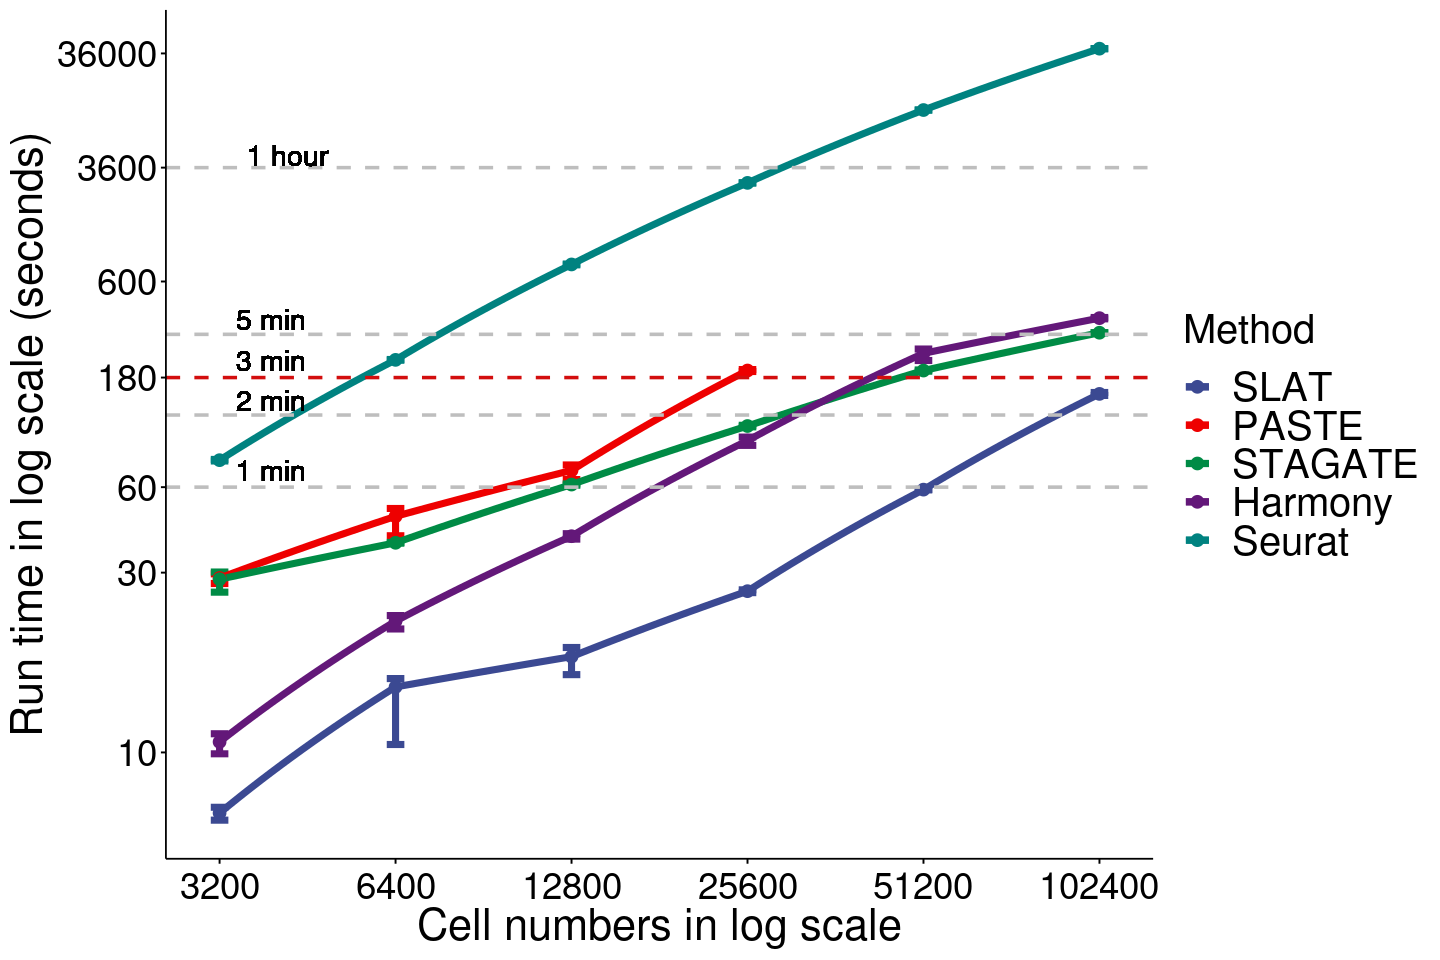

In [72]:
options(repr.plot.width=12, repr.plot.height=8)
ggline(data[data$dataset=='stereo_mouse_embryo' & data$method!='PCA',], x="cells", y="run_time", palette='aaas', color="method", legend.title = 'Method',
        add="mean_se", xlab ='Cell numbers in log scale', ylab='Run time in log scale (seconds)', size=2, lab.size=10, numeric.x.axis=T) %>% 
ggpar(legend='right', font.legend=24, font.subtitle=24, font.xtickslab=22, font.ytickslab=22, font.y=26, font.x=26) +
 theme(axis.text.x=element_text(angle=0, vjust=0.5, hjust=0.5)) +
 geom_hline(yintercept=3600, linetype="dashed", color="grey", size=1) + geom_text(aes(0, 4500, label='1 hour', hjust=-1), size=6) +
 geom_hline(yintercept=120, linetype="dashed", color="grey", size=1) + geom_text(aes(0, 140, label='2 min', hjust=-1), size=6) +
 geom_hline(yintercept=180, linetype="dashed", color="#d30e0e", size=1) + geom_text(aes(0, 220, label='3 min', hjust=-1), size=6) +
 geom_hline(yintercept=300, linetype="dashed", color="grey", size=1) + geom_text(aes(0, 360, label='5 min', hjust=-1), size=6) +
 geom_hline(yintercept=60, linetype="dashed", color="grey", size=1)+ geom_text(aes(0, 70, label='1 min', hjust=-1), size=6) +
 scale_y_continuous(breaks=c(10,30,60,180,600,3600,36000), trans='log2') +
 scale_x_continuous(breaks=c(200,400,800,1600,3200,6400,12800,25600,51200,102400), trans='log2')  + coord_trans(y="log2")

In [73]:
lm(log2(run_time) ~ log2(cells), data=data[data$method=='SLAT',])$coef

(Intercept) log2(cells) 
 -7.3264497   0.8473404

In [74]:
lm(log2(run_time) ~ log2(cells), data=data[data$method=='PASTE',])$coef

(Intercept) log2(cells) 
 -5.9603044   0.9024471

In [75]:
lm(log2(run_time) ~ log2(cells), data=data[data$method=='Seurat',])$coef

(Intercept) log2(cells) 
 -16.195594    1.886453

In [76]:
lm(log2(run_time) ~ log2(cells), data=data[data$method=='Harmony',])$coef

(Intercept) log2(cells) 
 -10.236003    1.139425

In [77]:
lm(log2(run_time) ~ log2(cells), data=data[data$method=='STAGATE',])$coef

(Intercept) log2(cells) 
 -3.8620957   0.7255612

# Heatmap

[1] "STAGATE"
[1] "Visium"
     mean_region_score mean_celltype_score mean_global_score
[1,]            0.6775                0.73           0.54875
[1] "Visium"
     mean_region_score mean_celltype_score mean_global_score
[1,]         0.7240625           0.7659375             0.595
[1] "Visium"
     mean_region_score mean_celltype_score mean_global_score
[1,]         0.7585937           0.7770312         0.6217187
[1] "Visium"
     mean_region_score mean_celltype_score mean_global_score
[1,]            0.7925           0.7988281         0.6538281
[1] "Visium"
     mean_region_score mean_celltype_score mean_global_score
[1,]         0.8158203               0.825         0.6883594
[1] "Visium"
     mean_region_score mean_celltype_score mean_global_score
[1,]          0.674375               0.675             0.505
[1] "Visium"
     mean_region_score mean_celltype_score mean_global_score
[1,]         0.6940625            0.688125           0.53625
[1] "Visium"
     mean_region_score mean_

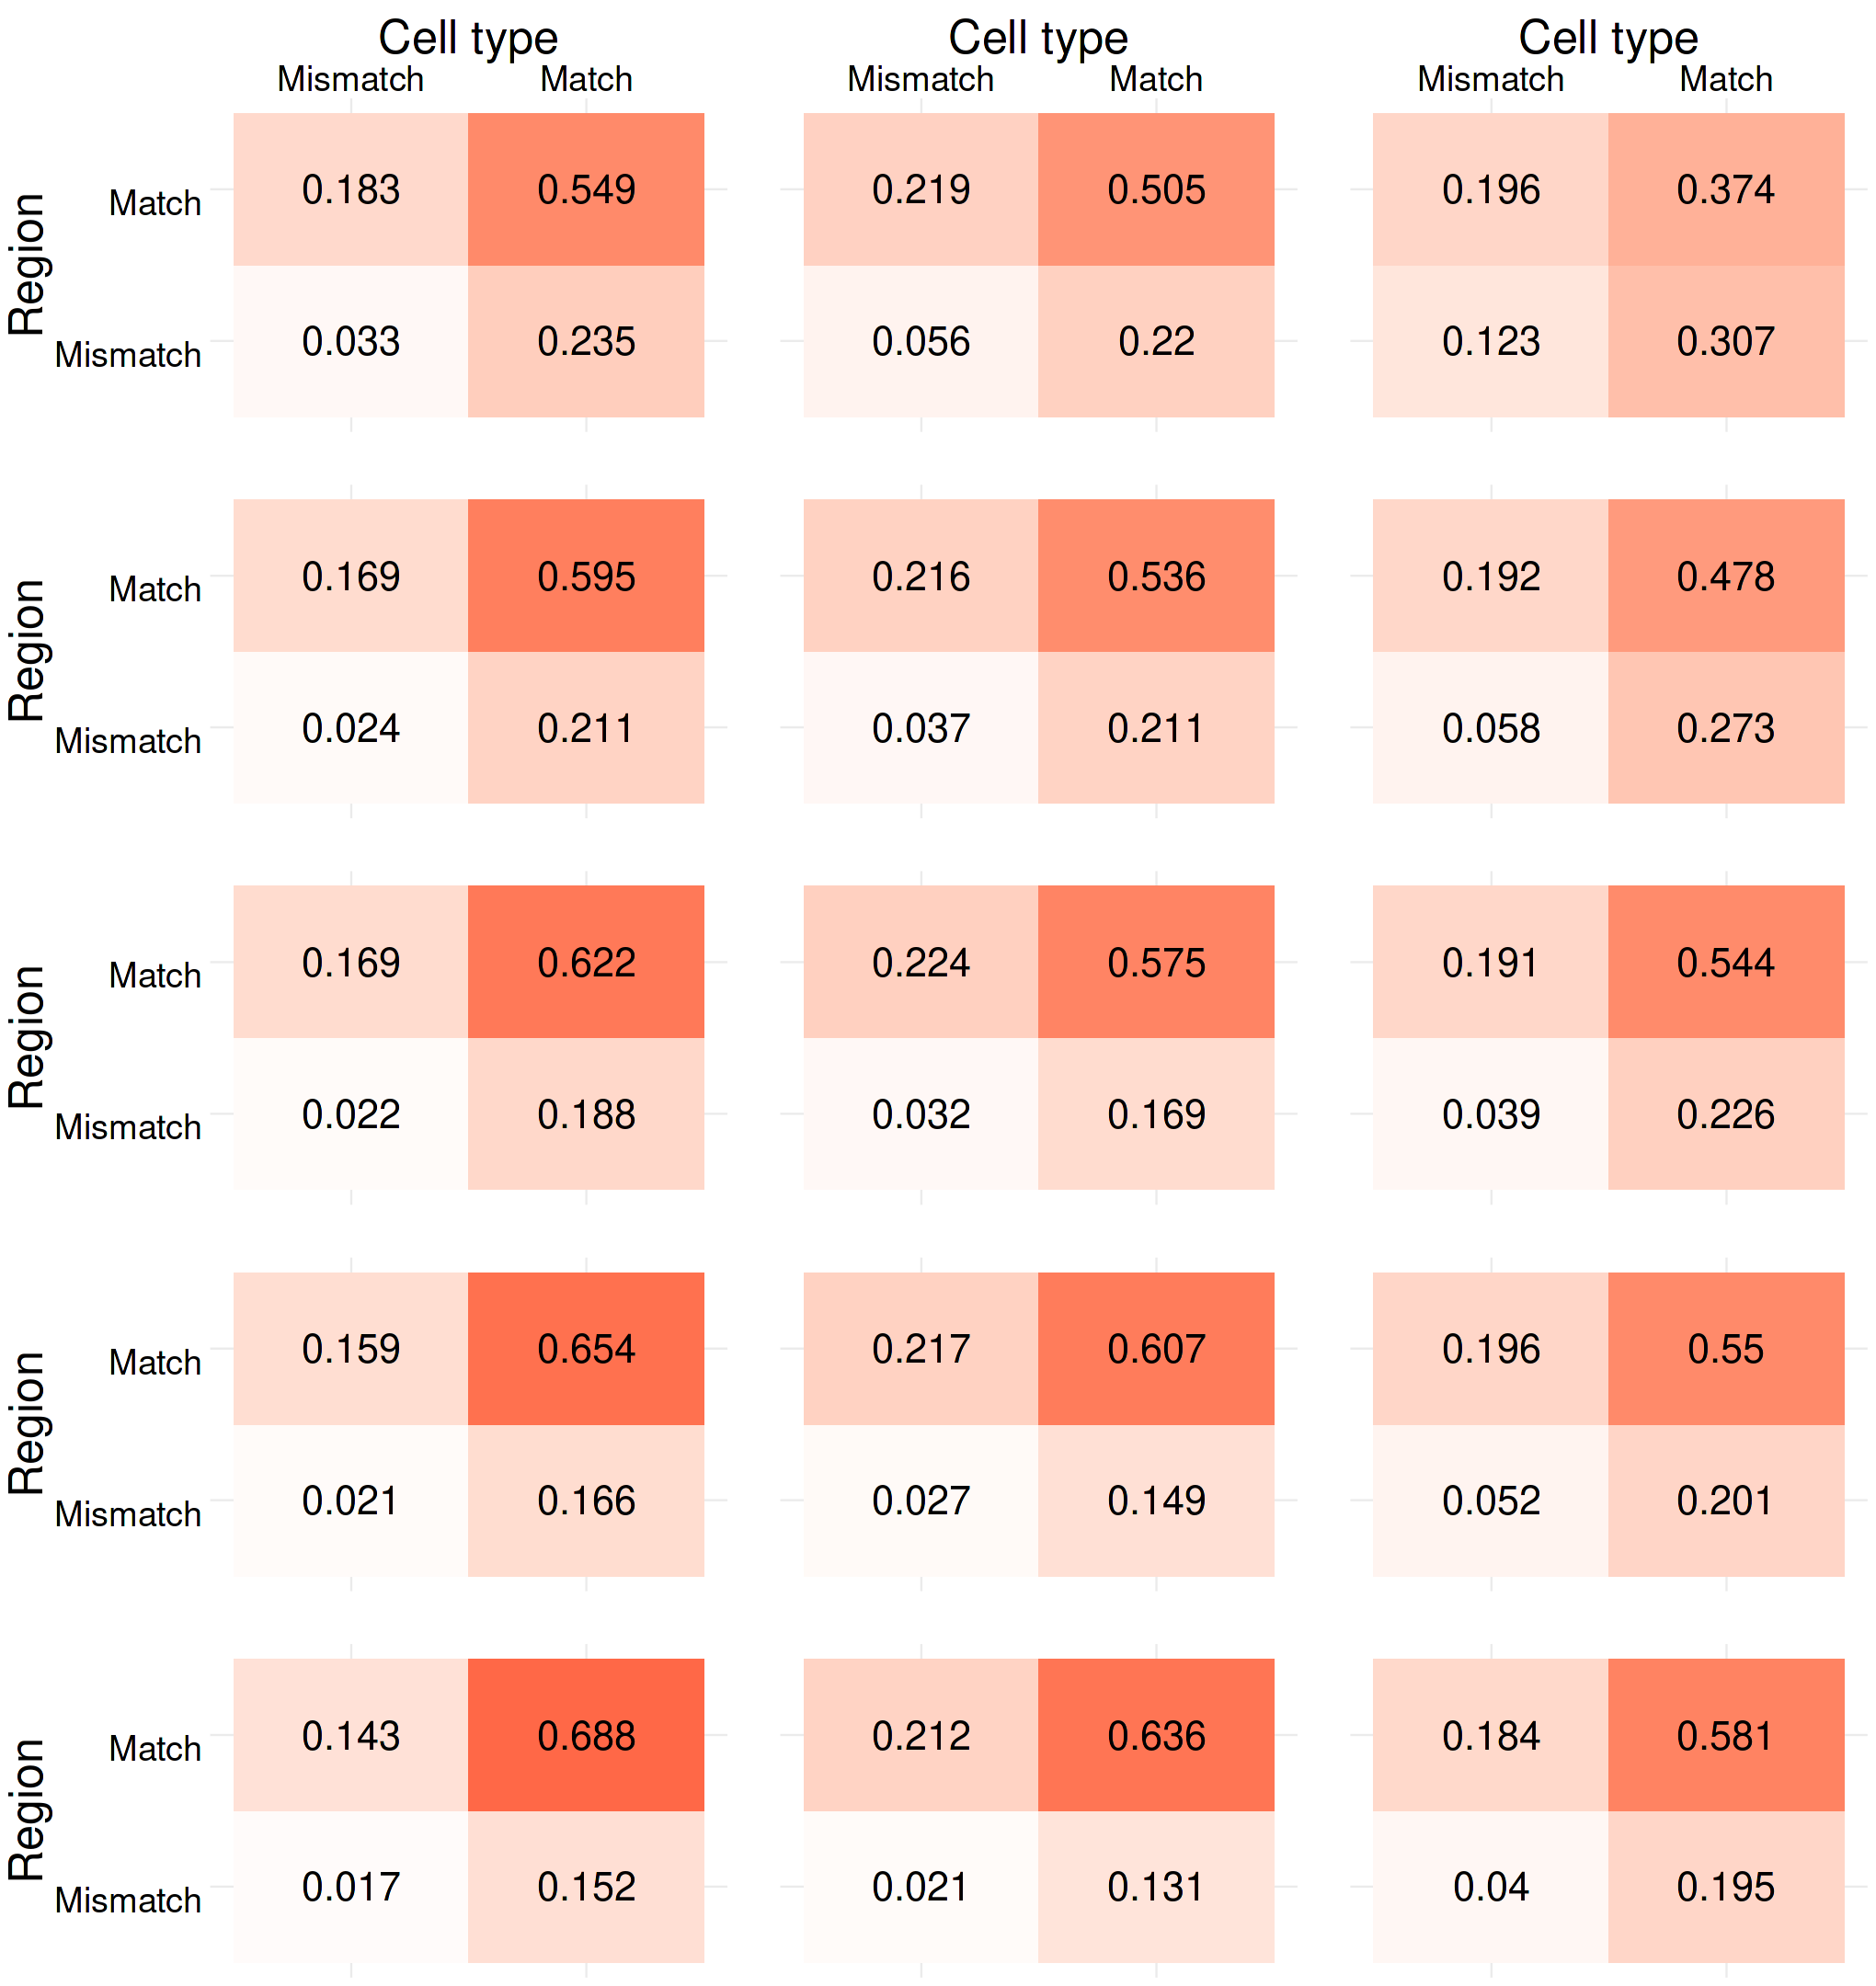

Warning message:
“Removed 4 rows containing missing values (`geom_text()`).”
Warning message:
“Removed 4 rows containing missing values (`geom_text()`).”


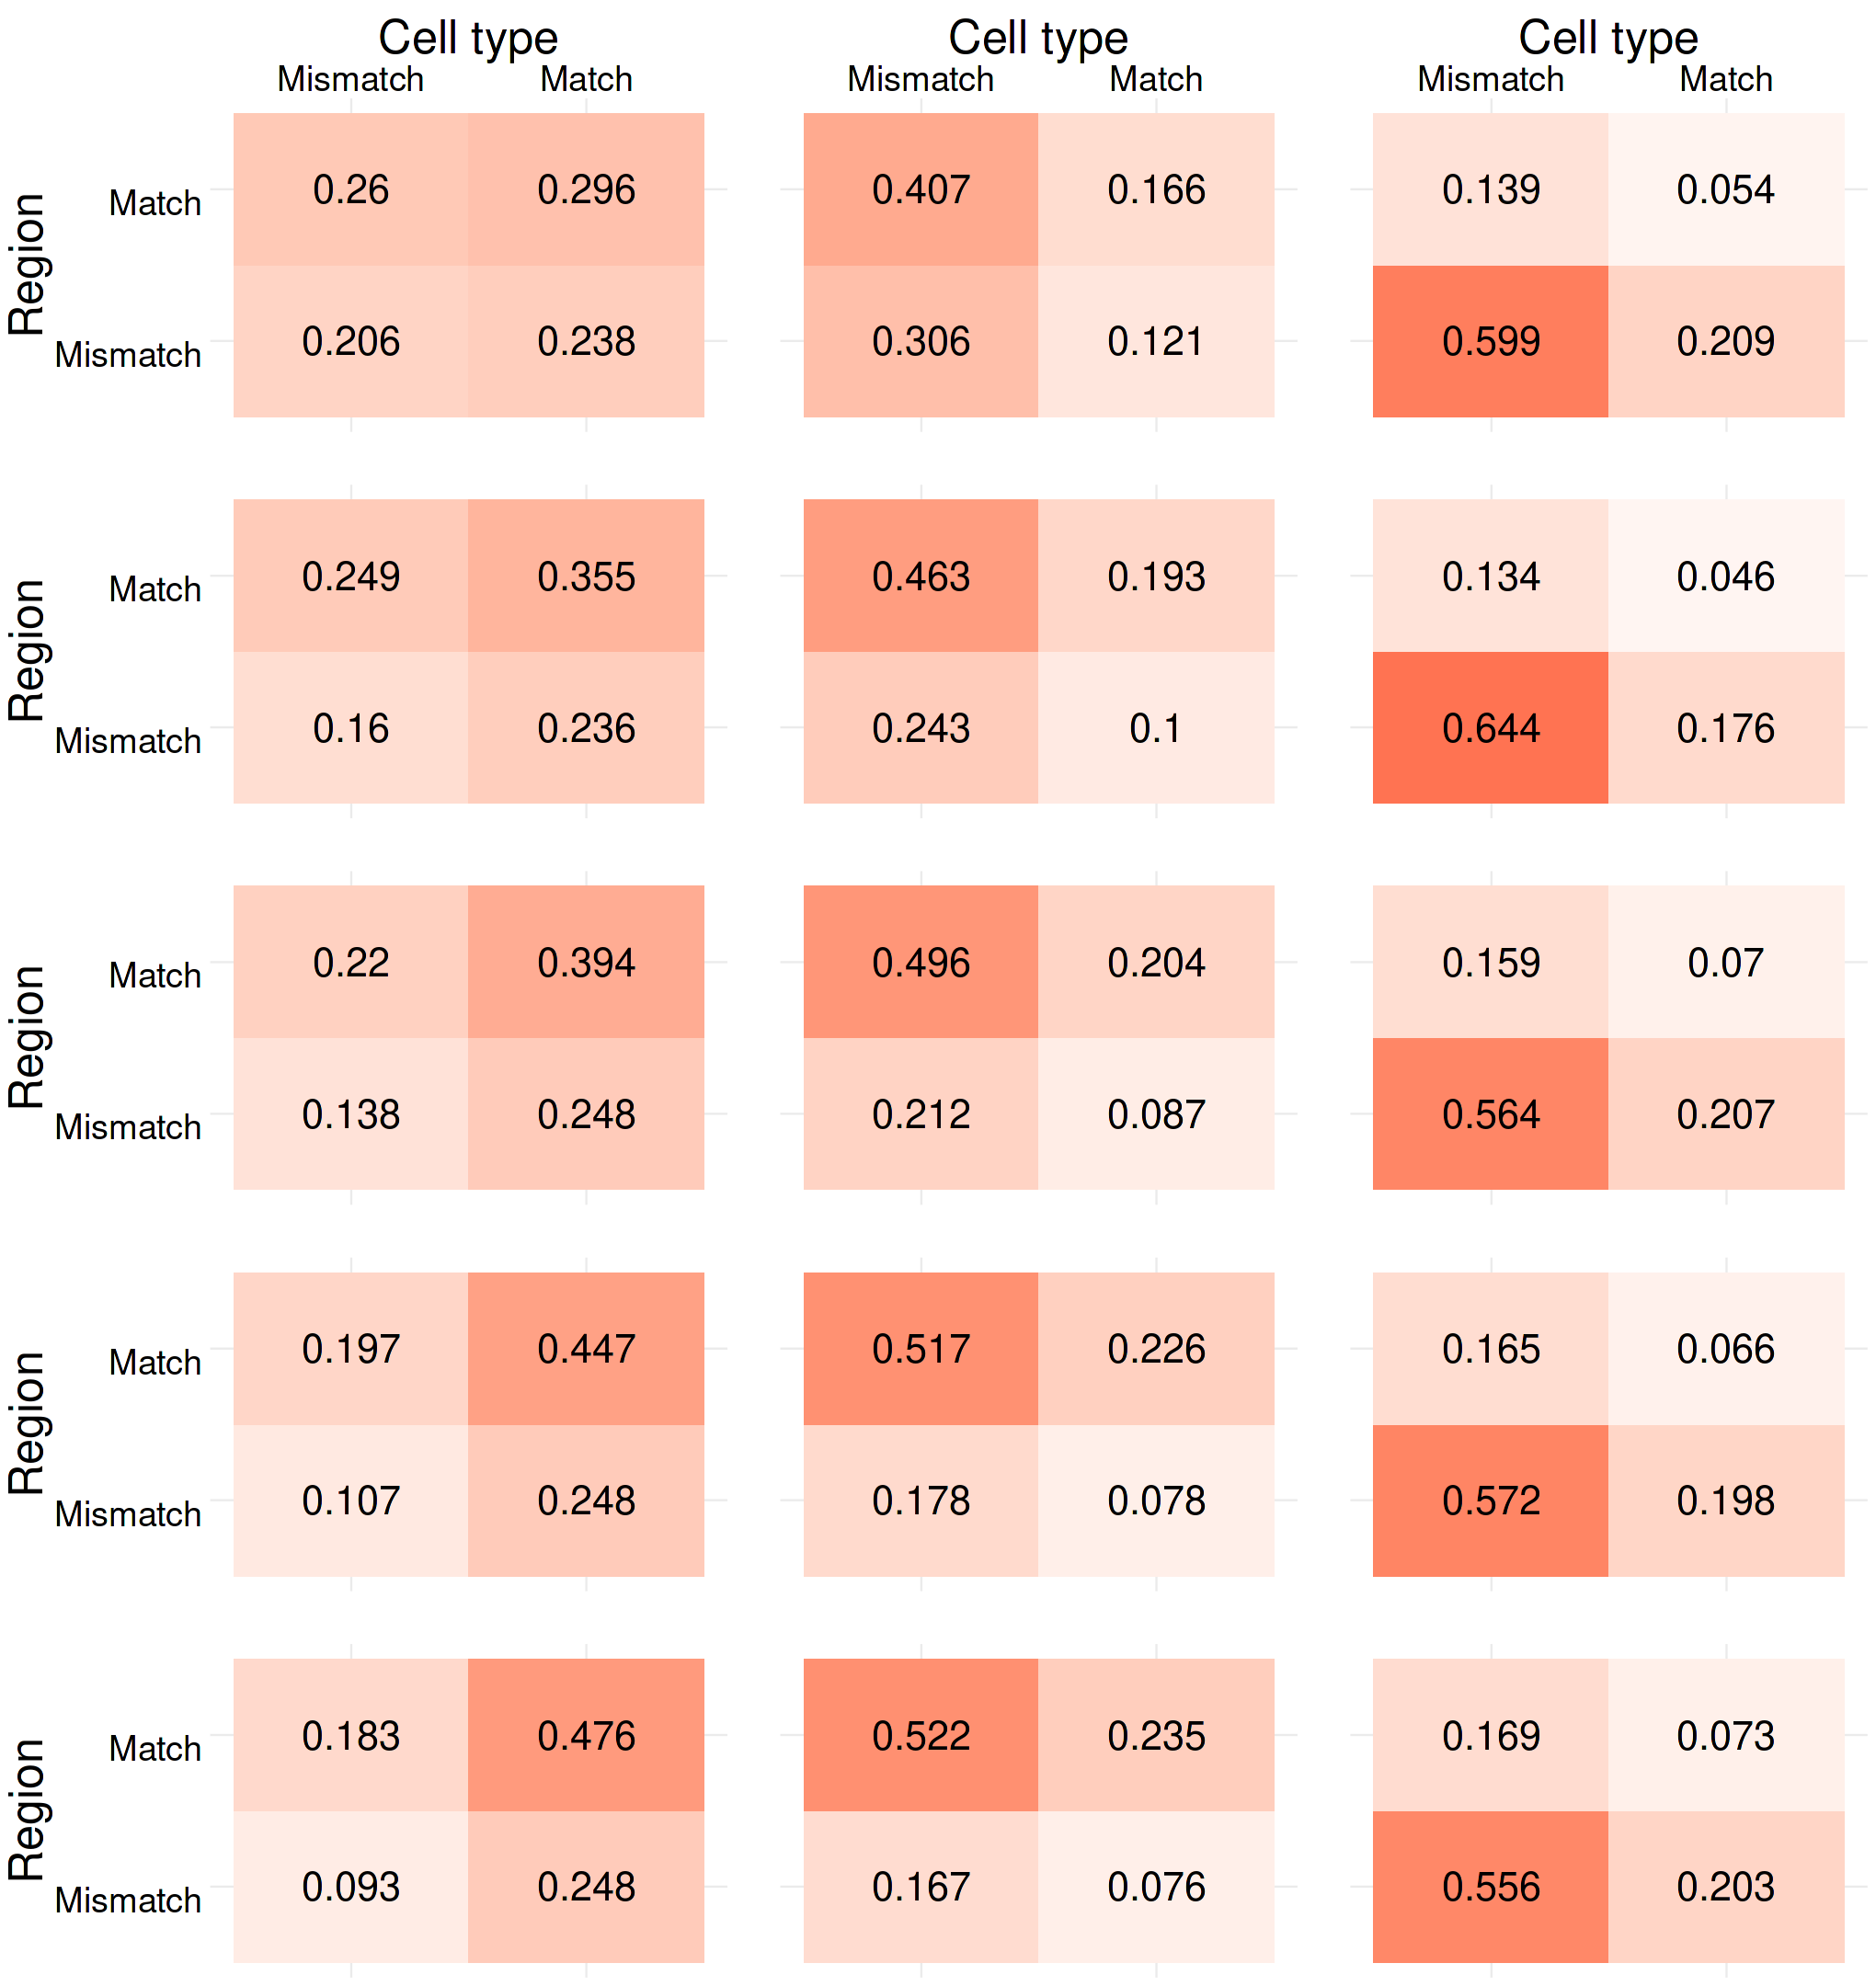

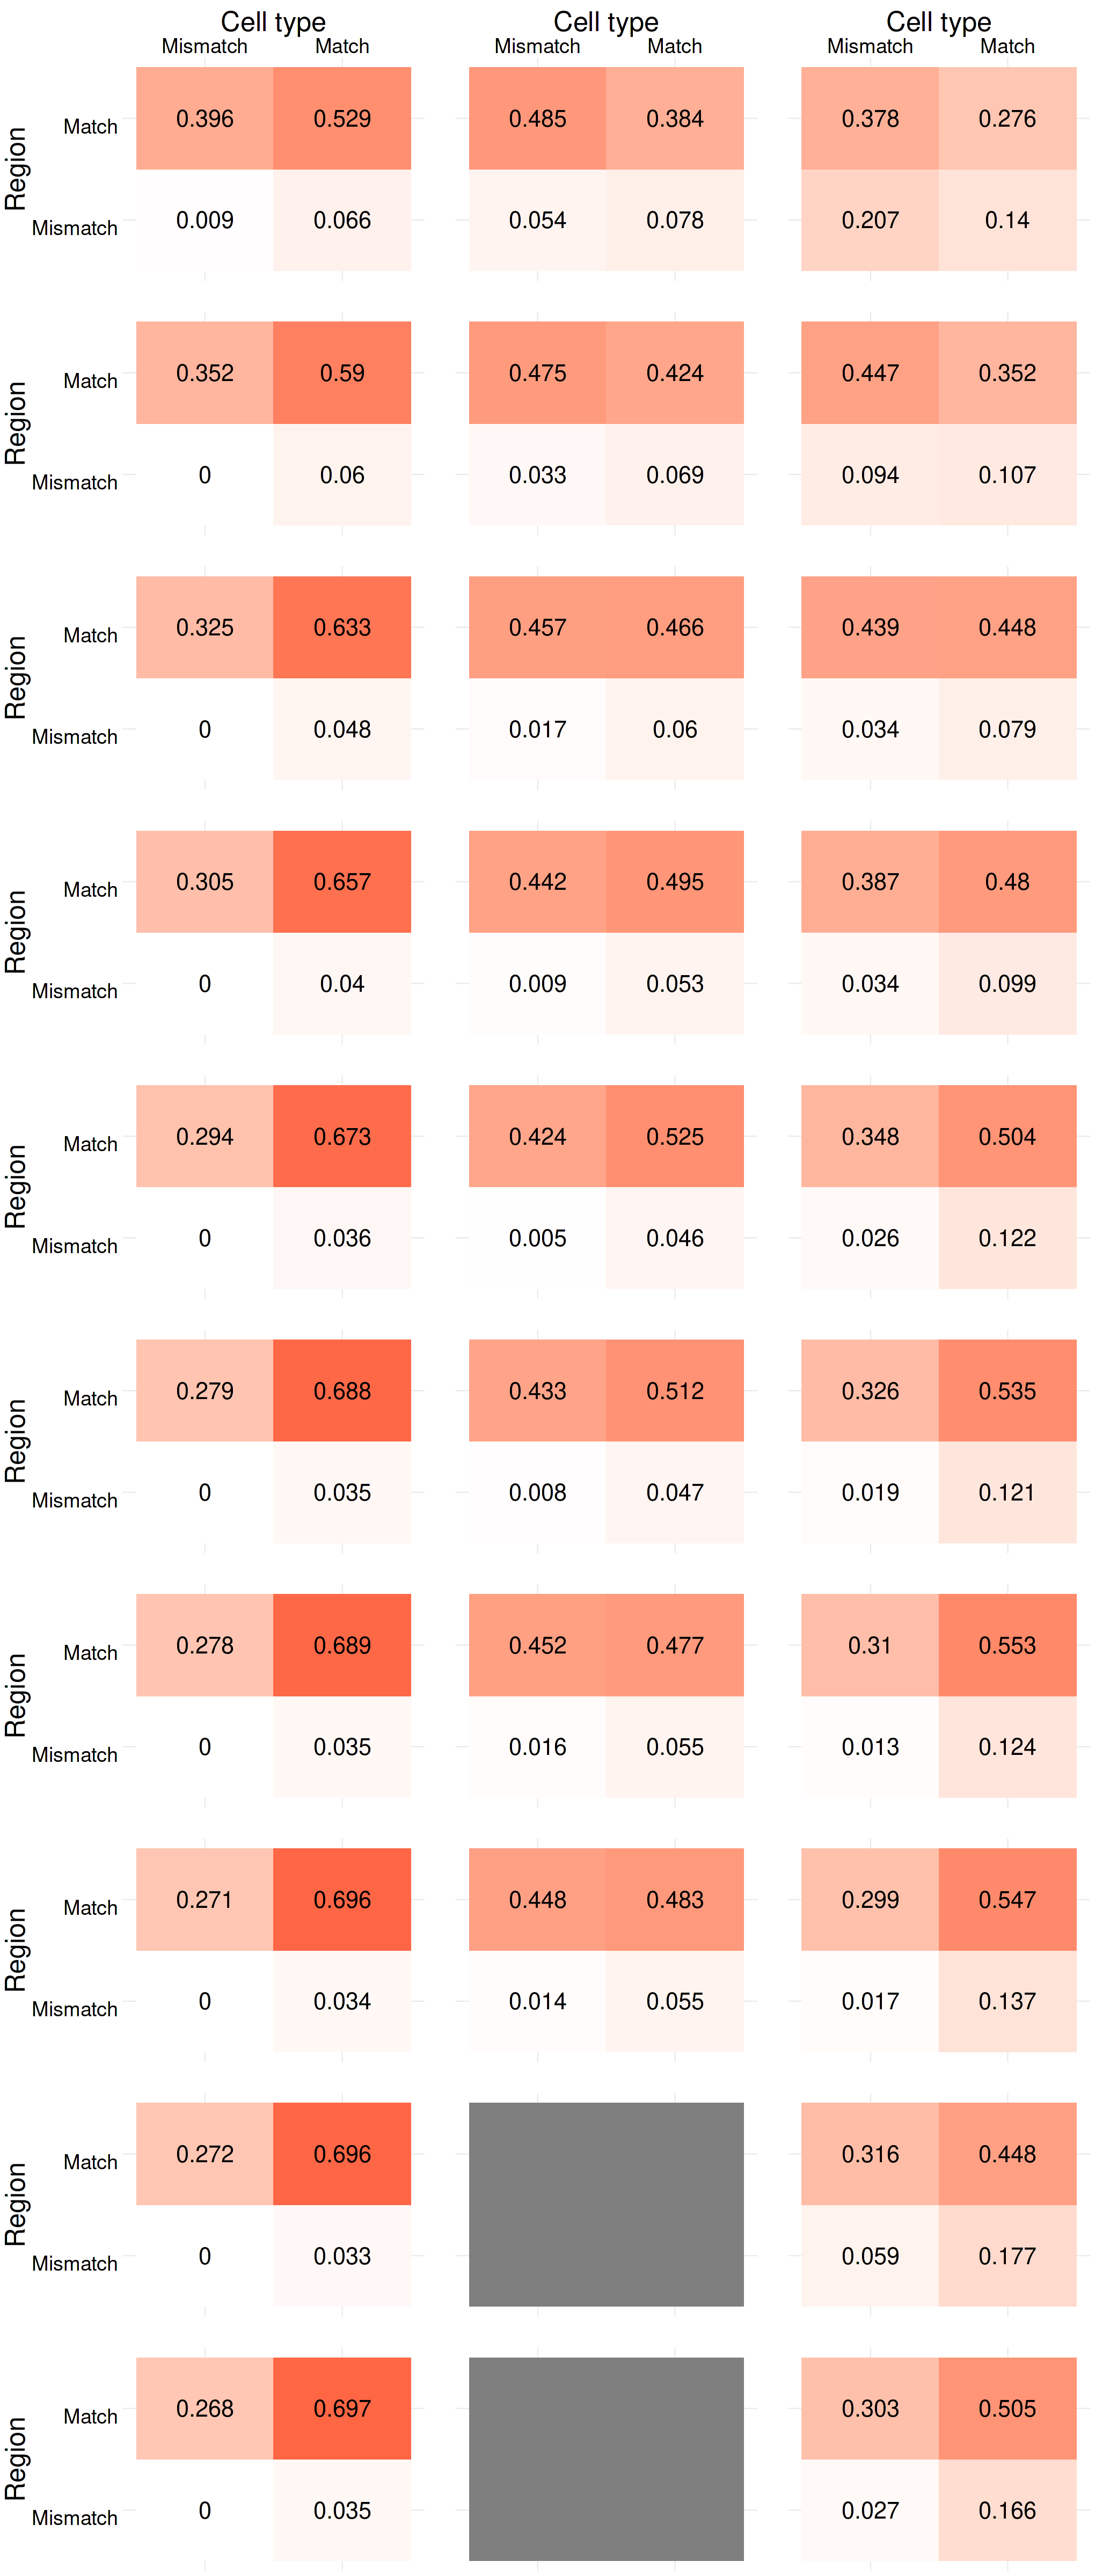

In [29]:
options(repr.plot.width=4, repr.plot.height=3)
p3_list <- list()
j <- 1 # column for methods
for(datasets in c('Visium','MERFISH','Stereo-seq')){
    i <- 1 # row for dataset
    p2_list <- list()
    print(methods)
    for(methods in c('SLAT','PASTE','STAGATE')){
        p_list <- list()
        k <- 1 # row for cell numbers
        if (datasets == 'Stereo-seq'){
            cell_number_split = c(200,400,800,1600,3200,6400,12800,25600,51200,102400)
        } else {
            cell_number_split = c(200,400,800,1600,3200)
        }
        for (cell_number in cell_number_split){
            print(datasets)
            data_method <- data %>% filter(method == methods, dataset == datasets, cell_number==cells)  %>% 
                summarise(mean_region_score = mean(region_score), mean_celltype_score = mean(celltype_score), mean_global_score = mean(global_score)) %>% 
                as.matrix()
            print(data_method)
            confusion_matrix <- matrix(0, nrow = 2, ncol = 2)
            confusion_matrix[2,2] <- data_method[1,3]
            confusion_matrix[1,2] <- data_method[1,1] * (1 - data_method[1,2])
            confusion_matrix[2,1] <- data_method[1,2] * (1 - data_method[1,1])
            confusion_matrix[1,1] <- 1 - confusion_matrix[1,2] - confusion_matrix[2,2] - confusion_matrix[2,1]
            rownames(confusion_matrix) <- c('Mismatch', 'Match')
            colnames(confusion_matrix) <- c('Mismatch', 'Match')
            confusion_matrix <- confusion_matrix %>% melt()
            colnames(confusion_matrix) <- c('Cell_type', 'Region', 'Ratio')
            # print(confusion_matrix)
            # replace element which smaller than 0 with 0
            confusion_matrix$Ratio[confusion_matrix$Ratio < 0] <- 0

            p <- ggplot(confusion_matrix, aes(x = Cell_type, y = Region, fill = Ratio)) + 
                geom_tile() + 
                geom_text(aes(x = Cell_type, y = Region, label = round(Ratio, digits = 3)), color = "black", size = 9) + 
                scale_fill_gradient2(low = "white", high = "red", limit = c(-0.01, 0.92)) +
                labs(x = 'Cell type', y = 'Region', title = paste0(methods,'-',datasets,'-',cell_number)) + 
                scale_x_discrete(position = "top") + 
                theme_minimal() +
                theme(  text = element_text(size = 28),
                        axis.text = element_text(vjust = 1, hjust = 0.5, color = "black"),
                        axis.title = element_text(size = 30),
                        plot.title = element_text(size = 30, hjust = 0.5),
                        legend.title = element_text(size = 22),
                        legend.text = element_text(size = 18),
                        axis.ticks = element_blank(),
                        plot.margin = unit(c(0,0,0,0), "pt",),
                        legend.position = "bottom",
                        legend.key.width = unit(40, "pt"),
                        legend.key.height = unit(20, "pt")
                    )
            if (TRUE) {p <- p + theme(legend.position = "none") }
            if (k > 1) {p <- p + labs(x='') + theme(axis.text.x = element_blank(), axis.ticks.x=element_blank()) }
            if (i > 1) {p <- p + labs(y='') + theme(axis.text.y = element_blank(), axis.ticks.y=element_blank()) }
            if (TRUE) {p <- p + theme(plot.title = element_blank())}
            # print(p)
            p_list[[k]] <- p
            k <- k + 1
            }
        p2 <- do.call(patchwork::wrap_plots, c(p_list, ncol = 1))
        p2_list[[i]] <- p2
        i <- i + 1
        }

    p3 <- do.call(patchwork::wrap_plots, c(p2_list, ncol = 3))
    p3_list[[j]] <- p3
    j <- j + 1
}

options(repr.plot.width = 17, repr.plot.height = 18)
p3_list[[1]]
options(repr.plot.width = 17, repr.plot.height = 18)
p3_list[[2]]
options(repr.plot.width = 17, repr.plot.height = 40)
p3_list[[3]]

[1] "Seurat"
[1] "Visium"
     mean_region_score mean_celltype_score mean_global_score
[1,]            0.6775                0.73           0.54875
[1] "Visium"
     mean_region_score mean_celltype_score mean_global_score
[1,]         0.7240625           0.7659375             0.595
[1] "Visium"
     mean_region_score mean_celltype_score mean_global_score
[1,]         0.7585937           0.7770312         0.6217187
[1] "Visium"
     mean_region_score mean_celltype_score mean_global_score
[1,]            0.7925           0.7988281         0.6538281
[1] "Visium"
     mean_region_score mean_celltype_score mean_global_score
[1,]         0.8158203               0.825         0.6883594
[1] "Visium"
     mean_region_score mean_celltype_score mean_global_score
[1,]          0.674375               0.675             0.505
[1] "Visium"
     mean_region_score mean_celltype_score mean_global_score
[1,]         0.6940625            0.688125           0.53625
[1] "Visium"
     mean_region_score mean_c

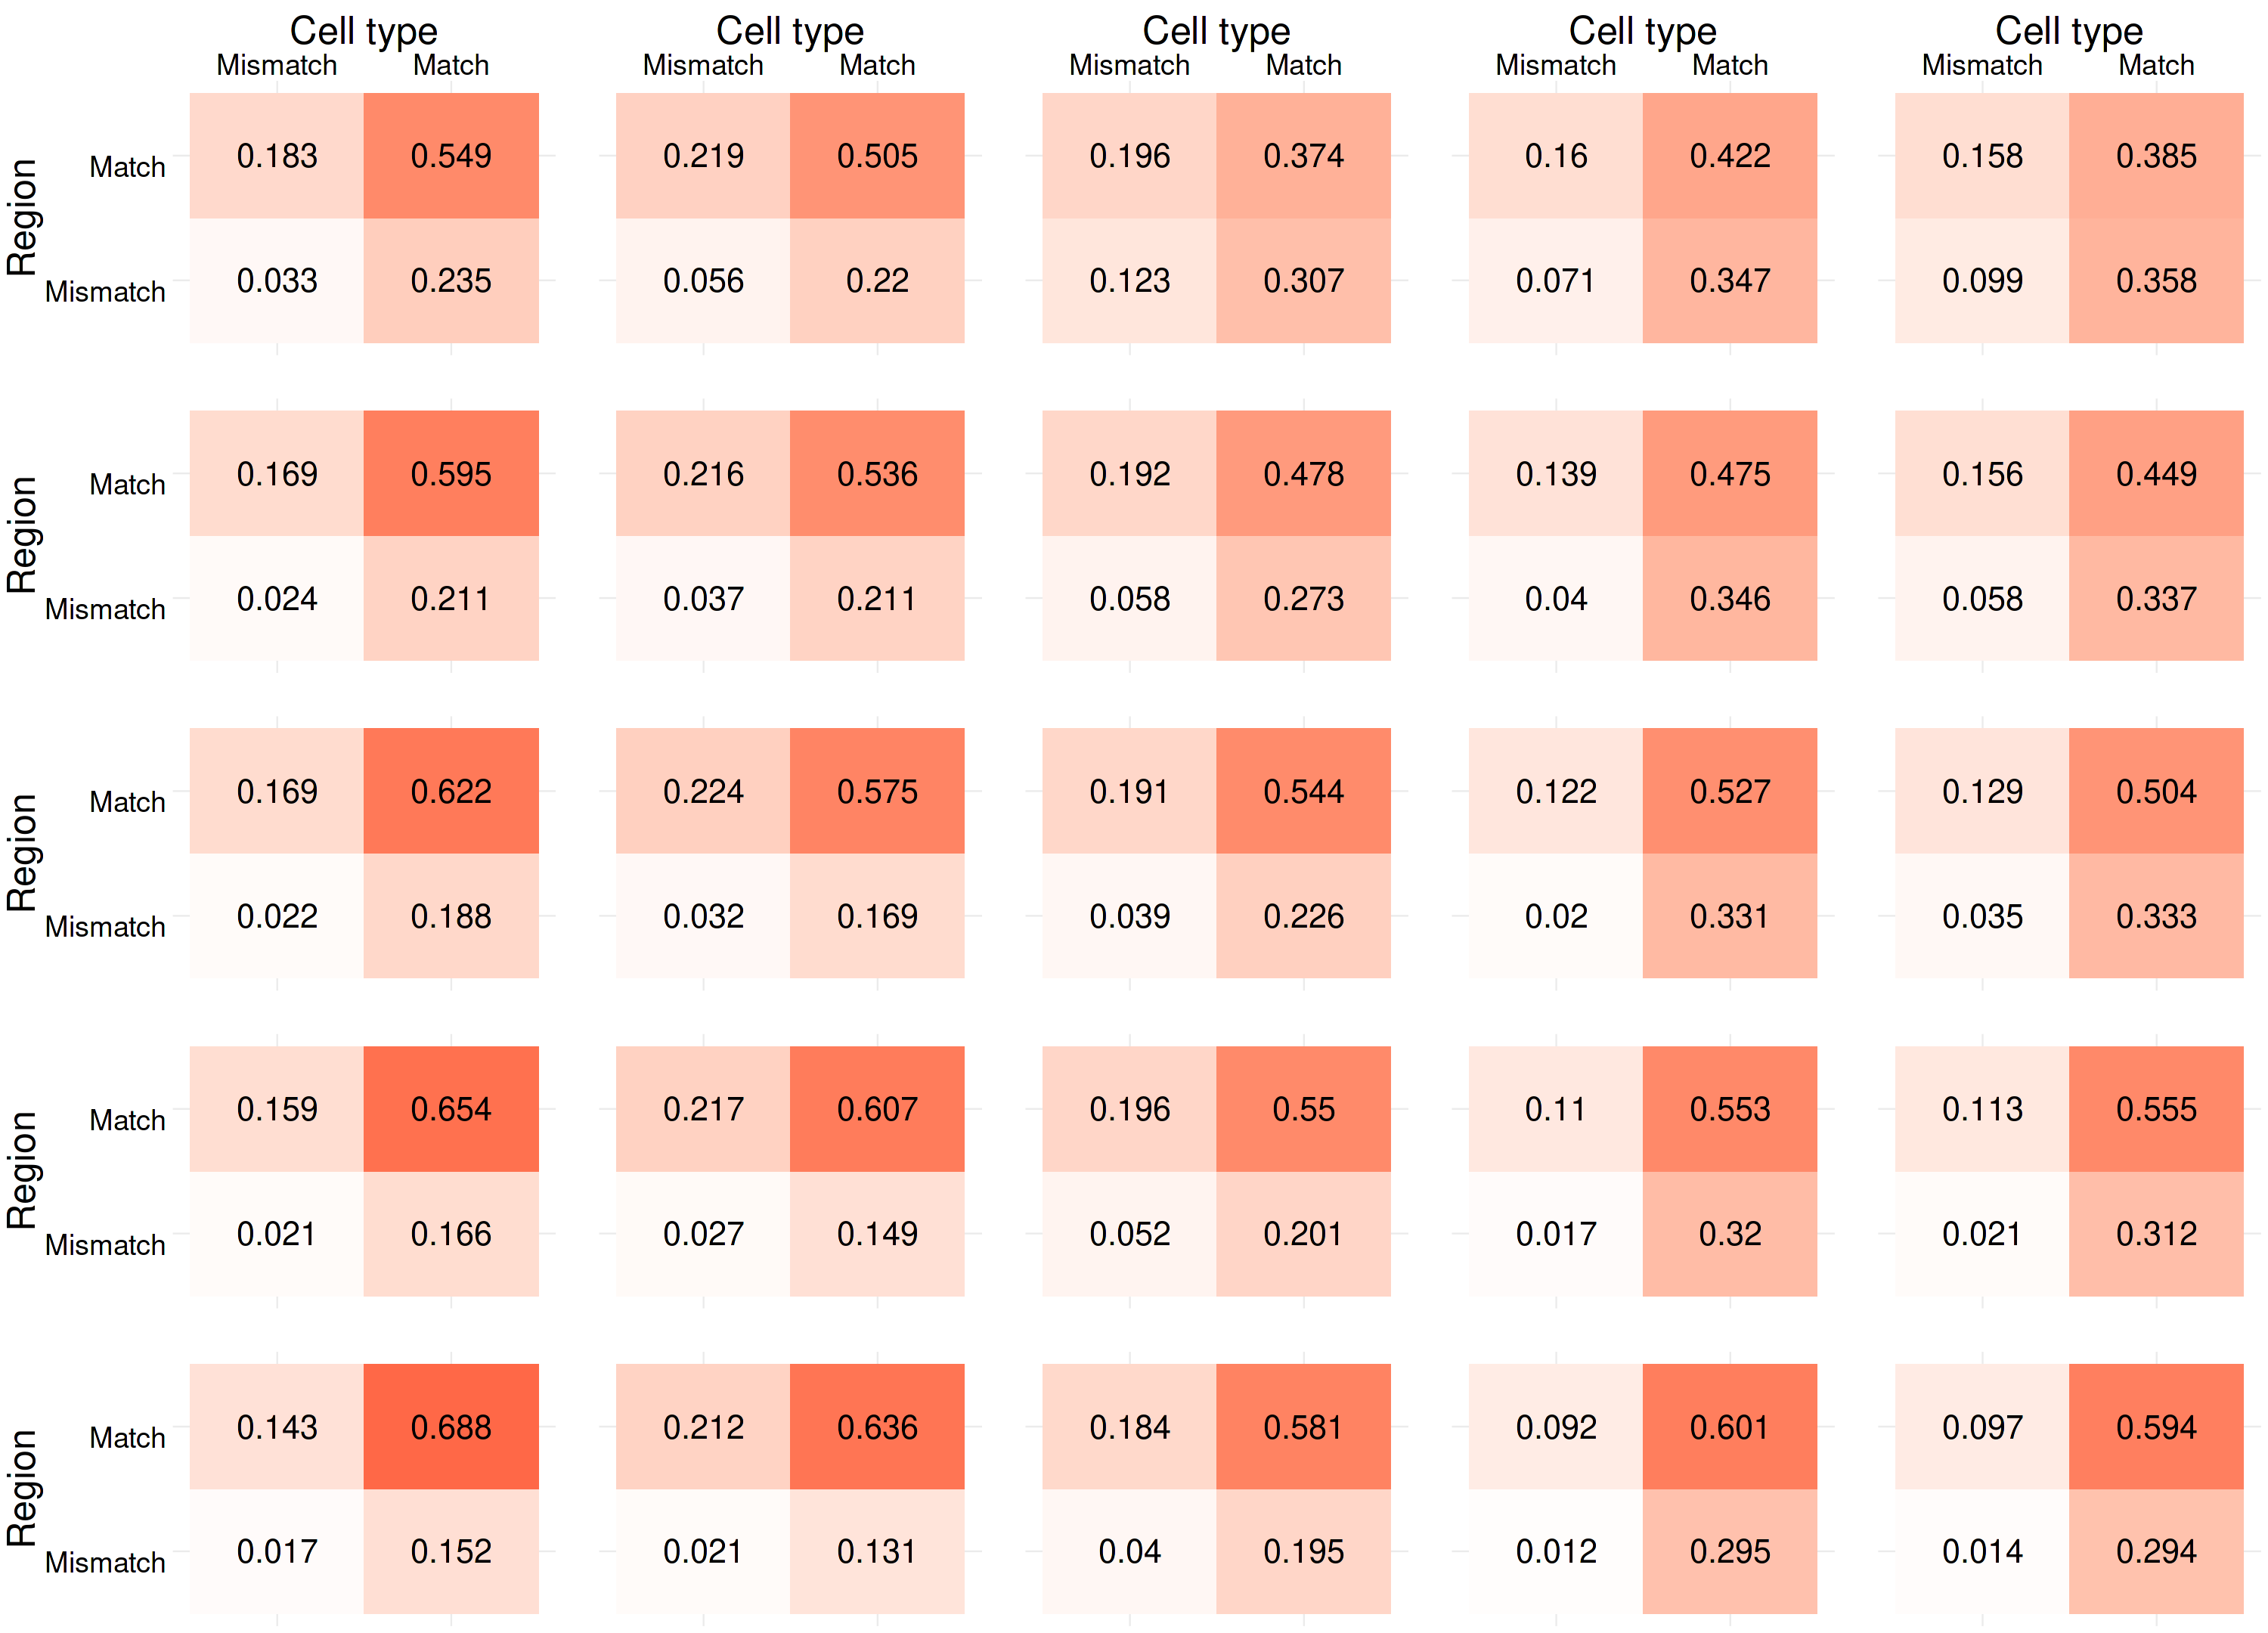

Warning message:
“Removed 4 rows containing missing values (`geom_text()`).”
Warning message:
“Removed 4 rows containing missing values (`geom_text()`).”


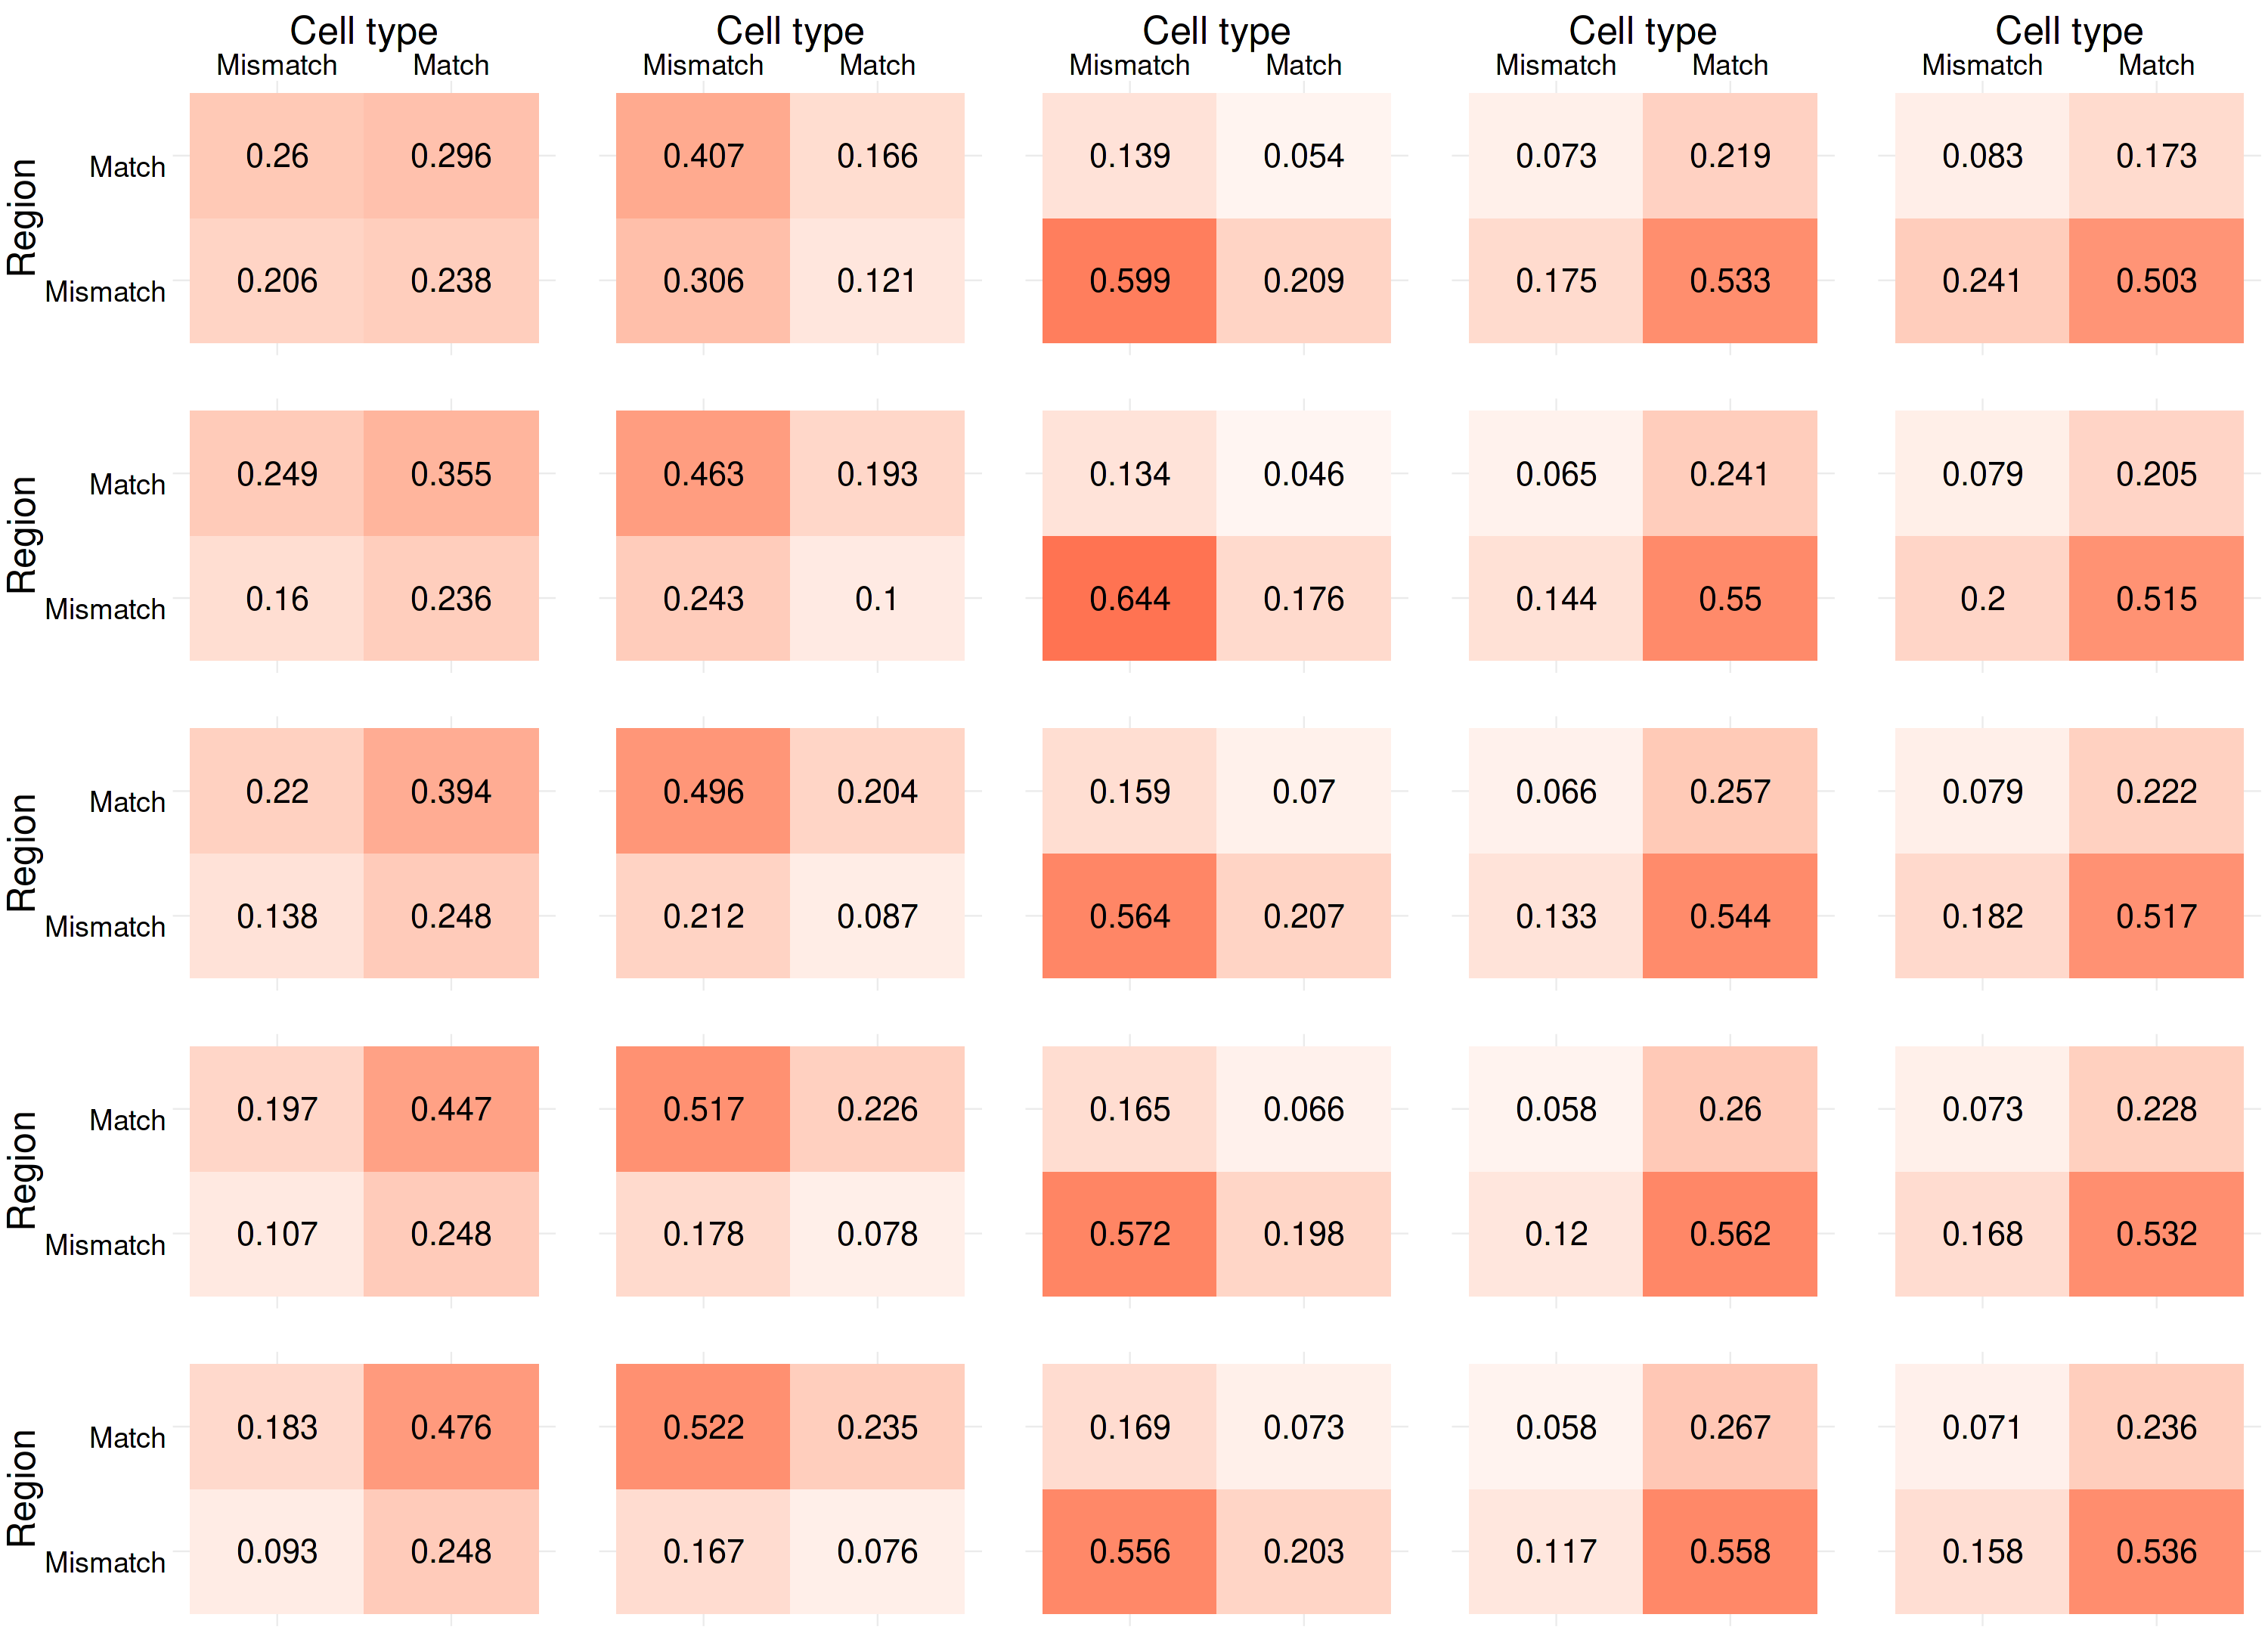

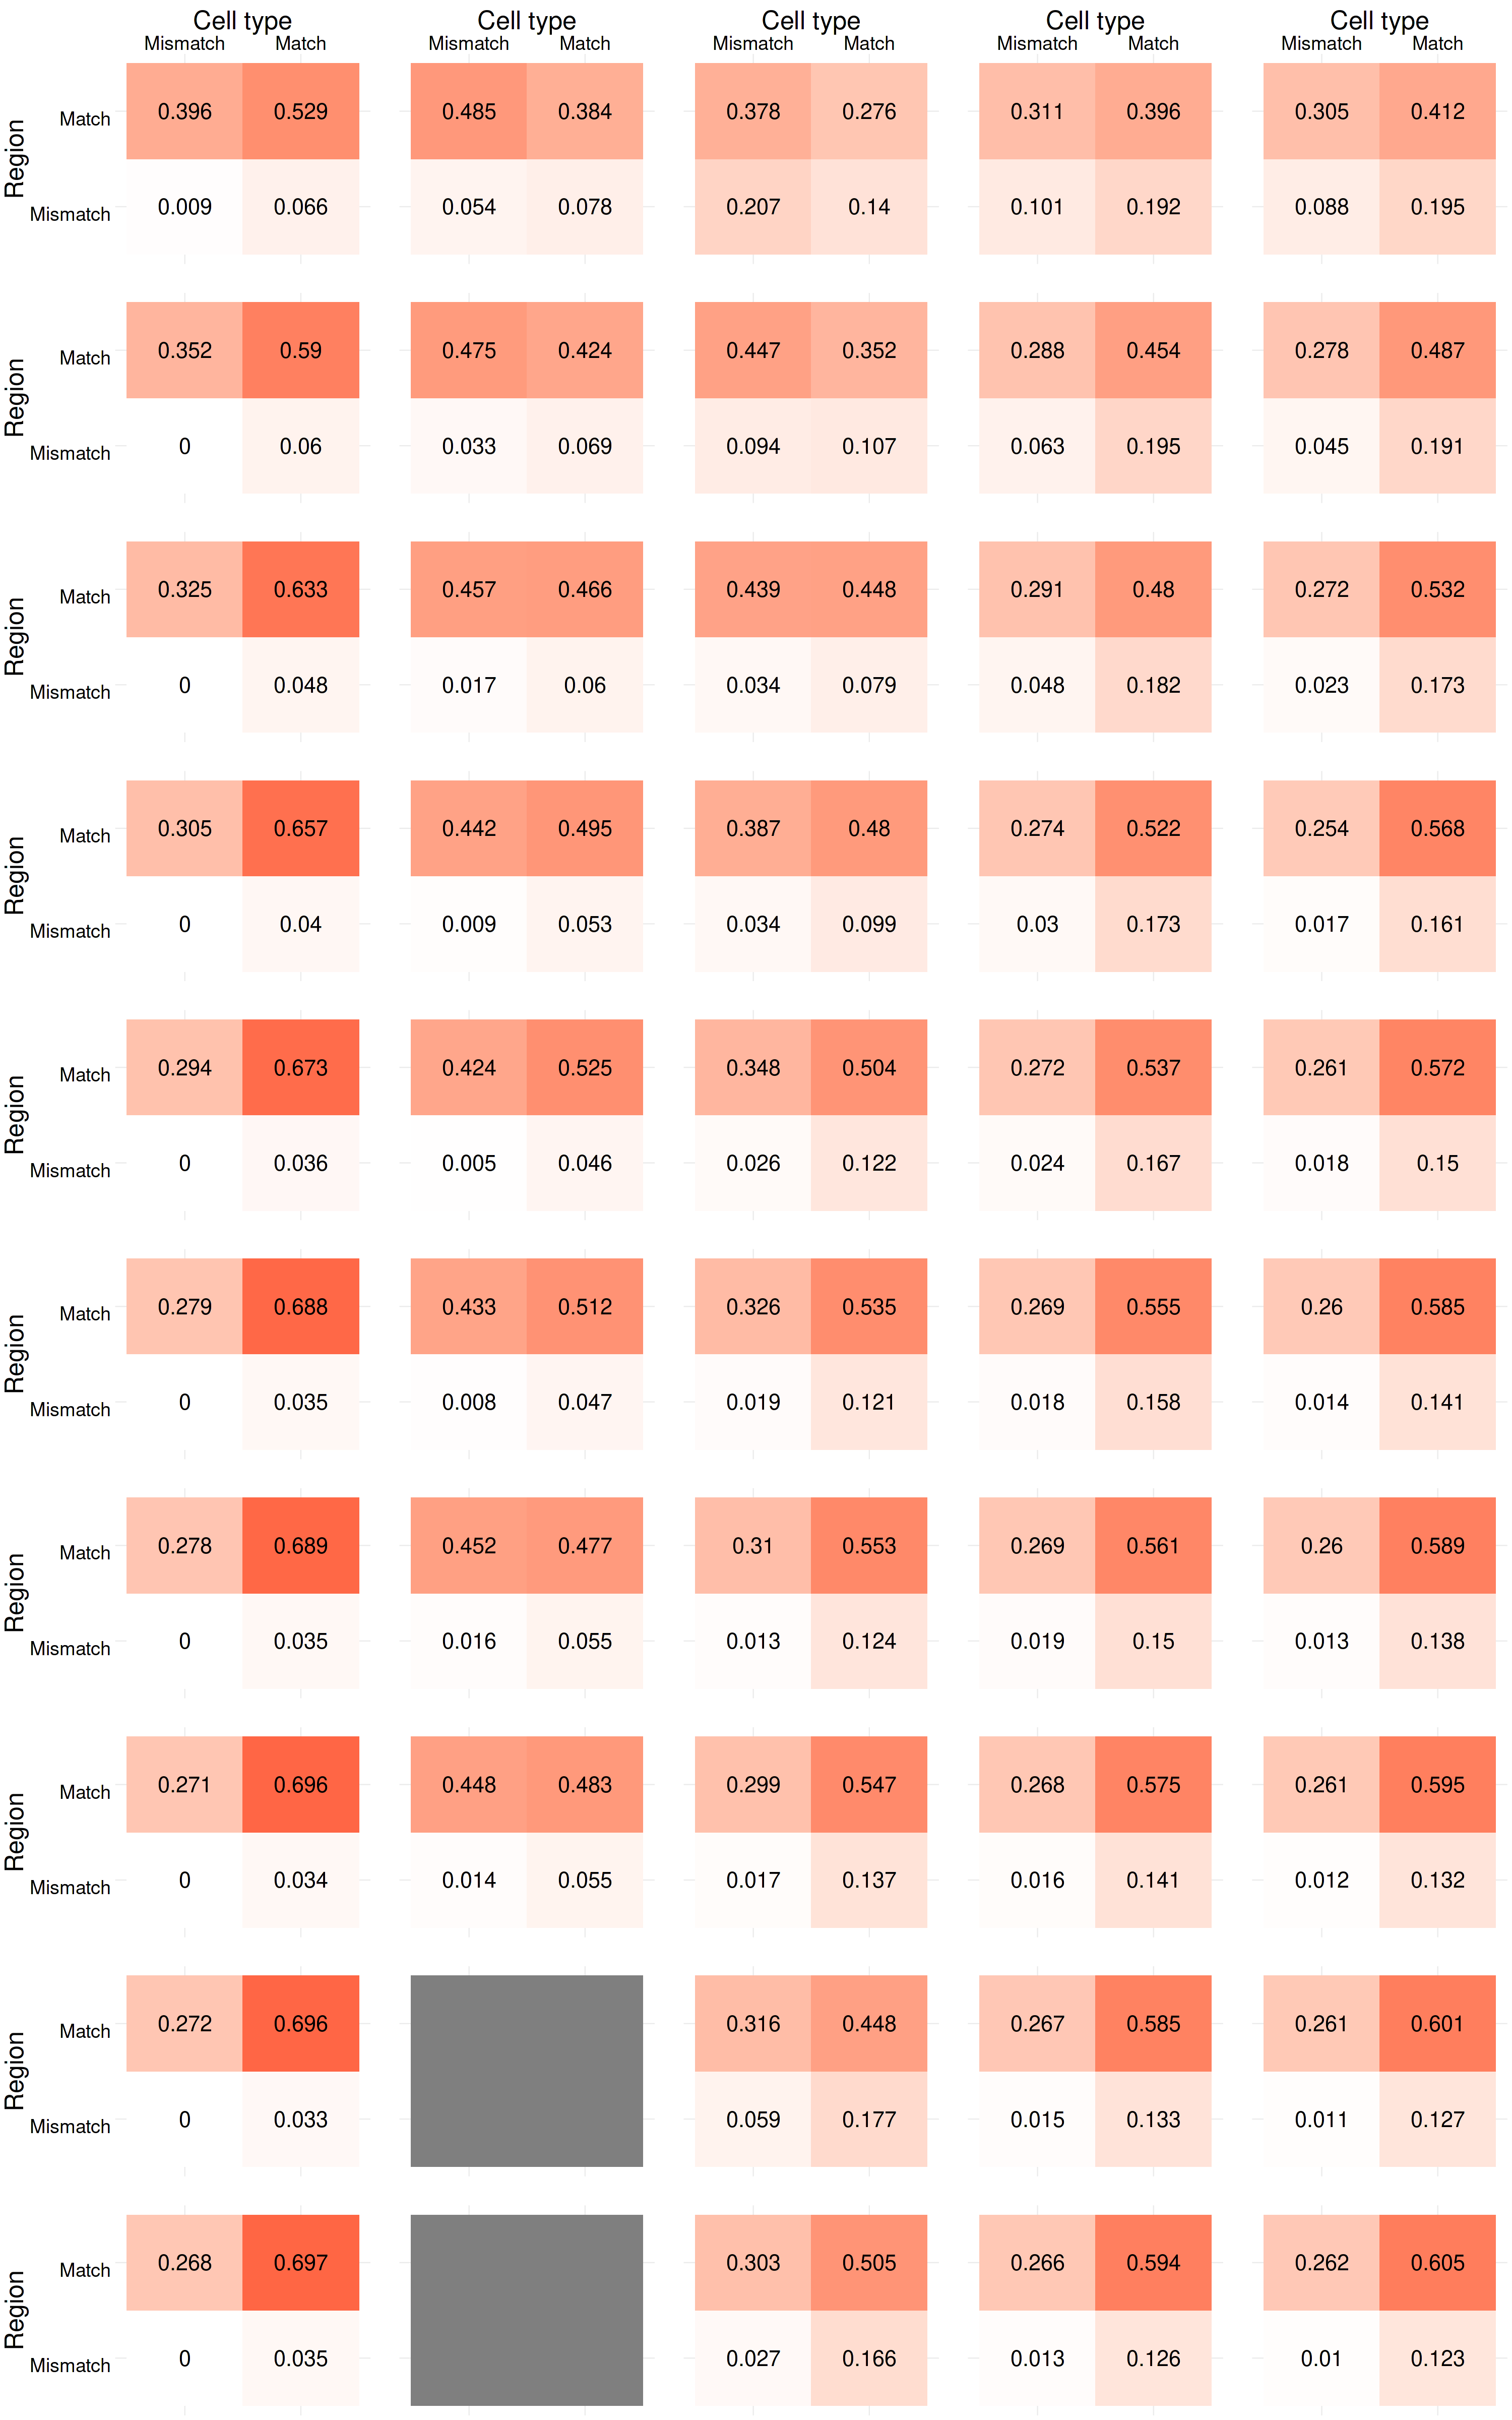

In [33]:
options(repr.plot.width=4, repr.plot.height=3)
p3_list <- list()
j <- 1 # column for methods
for(datasets in c('Visium','MERFISH','Stereo-seq')){
    i <- 1 # row for dataset
    p2_list <- list()
    print(methods)
    for(methods in c('SLAT', 'PASTE', 'STAGATE', 'Harmony', 'Seurat')){
        p_list <- list()
        k <- 1 # row for cell numbers
        if (datasets == 'Stereo-seq'){
            cell_number_split = c(200,400,800,1600,3200,6400,12800,25600,51200,102400)
        } else {
            cell_number_split = c(200,400,800,1600,3200)
        }
        for (cell_number in cell_number_split){
            print(datasets)
            data_method <- data %>% filter(method == methods, dataset == datasets, cell_number==cells)  %>% 
                summarise(mean_region_score = mean(region_score), mean_celltype_score = mean(celltype_score), mean_global_score = mean(global_score)) %>% 
                as.matrix()
            print(data_method)
            confusion_matrix <- matrix(0, nrow = 2, ncol = 2)
            confusion_matrix[2,2] <- data_method[1,3]
            confusion_matrix[1,2] <- data_method[1,1] * (1 - data_method[1,2])
            confusion_matrix[2,1] <- data_method[1,2] * (1 - data_method[1,1])
            confusion_matrix[1,1] <- 1 - confusion_matrix[1,2] - confusion_matrix[2,2] - confusion_matrix[2,1]
            rownames(confusion_matrix) <- c('Mismatch', 'Match')
            colnames(confusion_matrix) <- c('Mismatch', 'Match')
            confusion_matrix <- confusion_matrix %>% melt()
            colnames(confusion_matrix) <- c('Cell_type', 'Region', 'Ratio')
            # print(confusion_matrix)
            # replace element which smaller than 0 with 0
            confusion_matrix$Ratio[confusion_matrix$Ratio < 0] <- 0

            p <- ggplot(confusion_matrix, aes(x = Cell_type, y = Region, fill = Ratio)) + 
                geom_tile() + 
                geom_text(aes(x = Cell_type, y = Region, label = round(Ratio, digits = 3)), color = "black", size = 9) + 
                scale_fill_gradient2(low = "white", high = "red", limit = c(-0.01, 0.92)) +
                labs(x = 'Cell type', y = 'Region', title = paste0(methods,'-',datasets,'-',cell_number)) + 
                scale_x_discrete(position = "top") + 
                theme_minimal() +
                theme(  text = element_text(size = 28),
                        axis.text = element_text(vjust = 1, hjust = 0.5, color = "black"),
                        axis.title = element_text(size = 30),
                        plot.title = element_text(size = 30, hjust = 0.5),
                        legend.title = element_text(size = 22),
                        legend.text = element_text(size = 18),
                        axis.ticks = element_blank(),
                        plot.margin = unit(c(0,0,0,0), "pt",),
                        legend.position = "bottom",
                        legend.key.width = unit(40, "pt"),
                        legend.key.height = unit(20, "pt")
                    )
            if (TRUE) {p <- p + theme(legend.position = "none") }
            if (k > 1) {p <- p + labs(x='') + theme(axis.text.x = element_blank(), axis.ticks.x=element_blank()) }
            if (i > 1) {p <- p + labs(y='') + theme(axis.text.y = element_blank(), axis.ticks.y=element_blank()) }
            if (TRUE) {p <- p + theme(plot.title = element_blank())}
            # print(p)
            p_list[[k]] <- p
            k <- k + 1
            }
        p2 <- do.call(patchwork::wrap_plots, c(p_list, ncol = 1))
        p2_list[[i]] <- p2
        i <- i + 1
        }

    p3 <- do.call(patchwork::wrap_plots, c(p2_list, ncol = 5))
    p3_list[[j]] <- p3
    j <- j + 1
}

options(repr.plot.width = 25, repr.plot.height = 18)
p3_list[[1]]
options(repr.plot.width = 25, repr.plot.height = 18)
p3_list[[2]]
options(repr.plot.width = 25, repr.plot.height = 40)
p3_list[[3]]